In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
import matplotlib.pyplot as plt

import pickle
import json
import numpy as np

### 3.1 Experiments

In [59]:
models = ["hyperprior"]

In [60]:
for model in models:
    #temp, rates = generate_results(model=model)
    pass
    ## Weighted average across races


### 3.2 Experiments

In [61]:
races = ['Indian', 'Asian', 'African', 'Caucasian']
categories = ['skin_type', 'eye_type', 'nose_type', 'lip_type', 'hair_type', 'hair_color']
lambda_file_names = ["1"]
lambda_values = [1]
data_rate_values = ["clean"]
qualities = ["q_0001", "q_0009", "q_1", "q_2", "q_3"]
qres = ["1", "3", "6", "9", "12"]
rates = []
race_markers = ['s', 'o', '^', '*']

In [62]:
## for a model and generate accuracies for all rates
def generate_results(dataset="celebA", model="hyperprior"):
    rates = []
    results = {}
    for i, q in enumerate(qualities):
        results[q] = {}
        #Iterate through qualities and pull dictionaries
        with open(f'/media/global_data/fair_neural_compression_data/predictions/{model}/{dataset}/{q}/predictions.pkl', 'rb') as f:
            all_predictions = pickle.load(f)
        with open(f'/media/global_data/fair_neural_compression_data/predictions/hyperprior/celebA/clean/labels.pkl', 'rb') as f:
            all_labels = pickle.load(f)

        if model == "qres17m":
            with open(f'/media/global_data/fair_neural_compression_data/decoded_rfw/decoded_64x64/qres17m_lmb_64/celebA/{qres[i]}/stats.json', 'r') as json_file:
                        data_dict = json.load(json_file)
            bpp = data_dict['results']['bpp']
        else:
            with open(f'/media/global_data/fair_neural_compression_data/decoded_rfw/decoded_64x64/{model}/{dataset}/{q}/stats.json', 'r') as json_file:
                        data_dict = json.load(json_file)
            bpp = data_dict['compress_bpp']
        rates.append(bpp)
        for race in races:
            results[q][race] = {}
            for cat in categories:
                pred = all_predictions[race][cat]
                labels = all_labels[race][cat]
                score = accuracy_score(pred, labels)
                results[q][race][cat] = score      
    temp = {}
    for cat in categories:
        temp[cat] = {}
        for race in races:
            temp[cat][race] = [results[q][race][cat] for q in qualities]
    return temp, rates

In [63]:
def get_clean_pred(dataset="celebA", model="hyperprior"):
    with open(f'/media/global_data/fair_neural_compression_data/predictions/{model}/{dataset}/clean/predictions.pkl', 'rb') as f:
                all_predictions = pickle.load(f)
    with open(f'/media/global_data/fair_neural_compression_data/predictions/hyperprior/celebA/clean/labels.pkl', 'rb') as f:
                all_labels = pickle.load(f)
    results = {}
    for race in races:
            results[race] = {}
            for cat in categories:
                pred = all_predictions[race][cat]
                labels = all_labels[race][cat]
                results[race][cat] = accuracy_score(pred, labels)
    return results

In [64]:
temp, rates = generate_results(model="qres17m")
ff_temp, ff_rates = generate_results("fairface", model="qres17m")
results = get_clean_pred()
ff_results = get_clean_pred("fairface")

FileNotFoundError: [Errno 2] No such file or directory: '/media/global_data/fair_neural_compression_data/decoded_rfw/decoded_64x64/qres17m_lmb_64/celebA/q_64/1/stats.json'

In [ ]:
def plot_races_and_fairness(temp, rates, results):
    fig, axes = plt.subplots(len(categories), figsize=(8, 24), sharey=True)

    colors = ['b', 'y', 'g', 'r']
    
    for i, cat in enumerate(categories):
        zz = []
        axes[i].set_title(cat)
        for j, race in enumerate(races):
            axes[i].plot(rates, temp[cat][race], marker=race_markers[j], color = colors[j], label=race)
            zz.append(temp[cat][race])
        axes[i].legend()
        axes[i].plot(rates, np.array(zz).max(0) - np.array(zz).min(0), marker=race_markers[j], color = 'black', label="Fairness")
        #print(np.array(zz).max(0) - np.array(zz).min(0))

    for j, race in enumerate(races):
        for i, cat in enumerate(categories):
            axes[i].axhline(results[race][cat], linestyle="--", color=colors[j])
    
    plt.show()

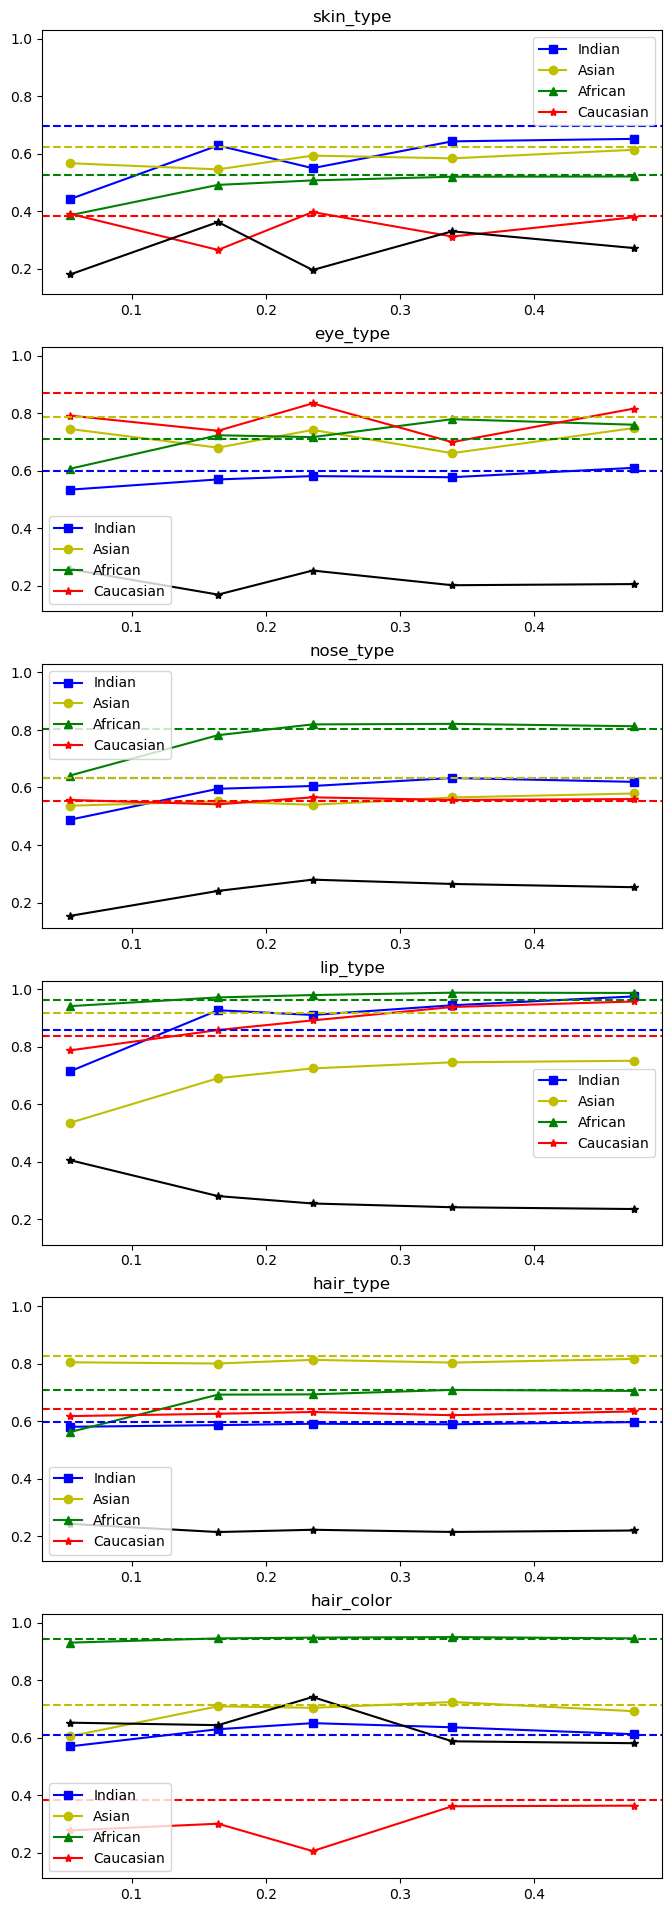

In [ ]:
plot_races_and_fairness(temp, rates, results)

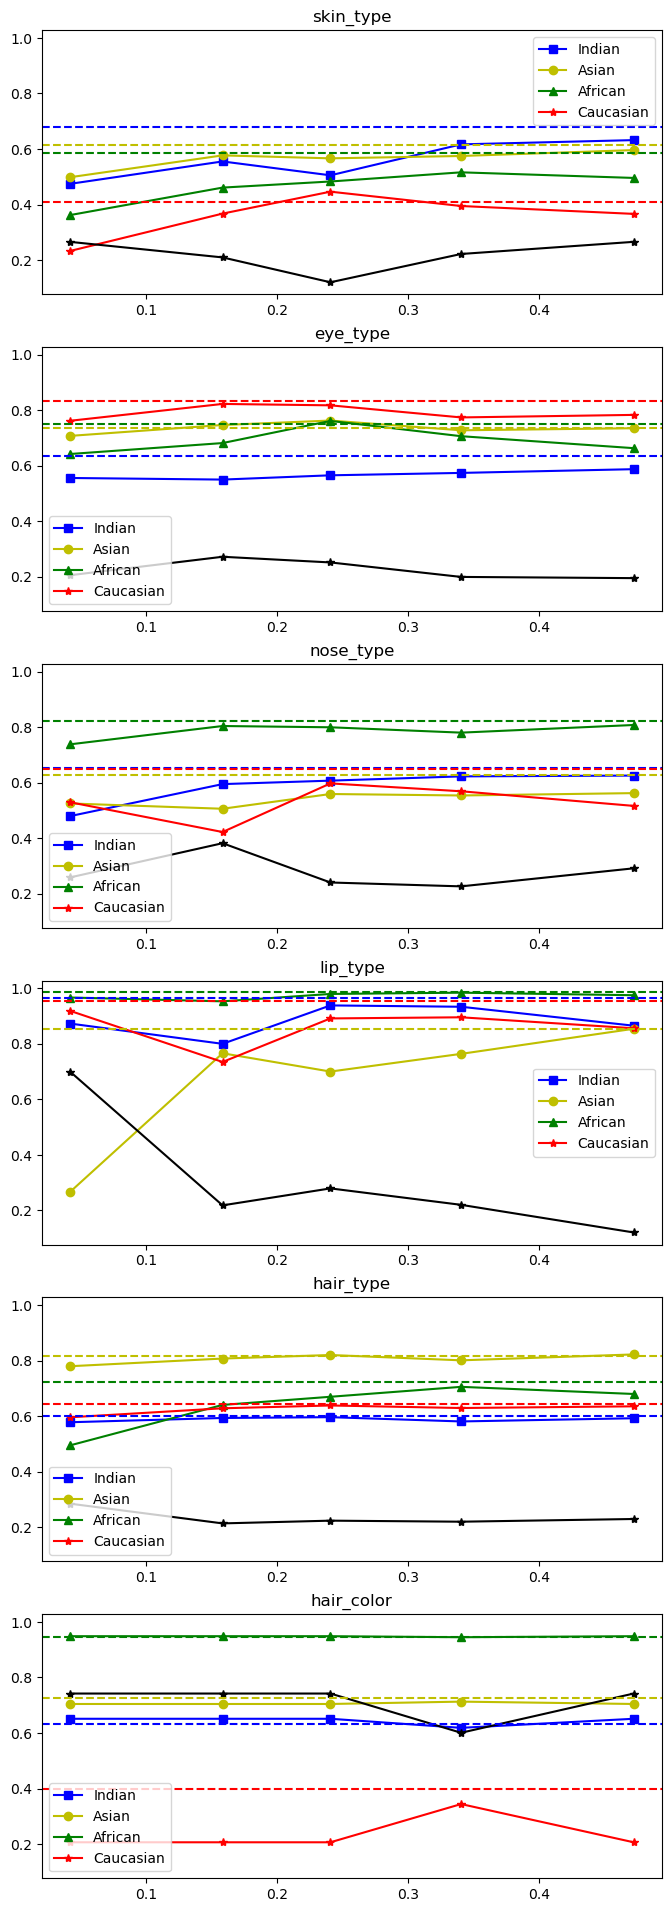

In [ ]:
plot_races_and_fairness(ff_temp, ff_rates, ff_results)

In [ ]:
def plot_fairness_comparison(temp, ff_temp, rates):
    fig, axes = plt.subplots(len(categories), figsize=(8, 24), sharey=True)

    colors = ['b', 'y', 'g', 'r']
    
    for i, cat in enumerate(categories):
        zz = []
        yy = []
        axes[i].set_title(cat)
        for j, race in enumerate(races):
            #axes[i].plot(rates, temp[cat][race], marker=race_markers[j], color = colors[j], label=race)
            zz.append(temp[cat][race])
            yy.append(ff_temp[cat][race])
        axes[i].plot(rates, np.array(zz).max(0) - np.array(zz).min(0), marker=race_markers[j], color = 'black', label="celebA Fairness")
        axes[i].plot(rates, np.array(yy).max(0) - np.array(yy).min(0), marker=race_markers[j], color = 'green', label="FF Fairness")
        axes[i].legend()
        #print(np.array(zz).max(0) - np.array(zz).min(0))
    
    plt.show()

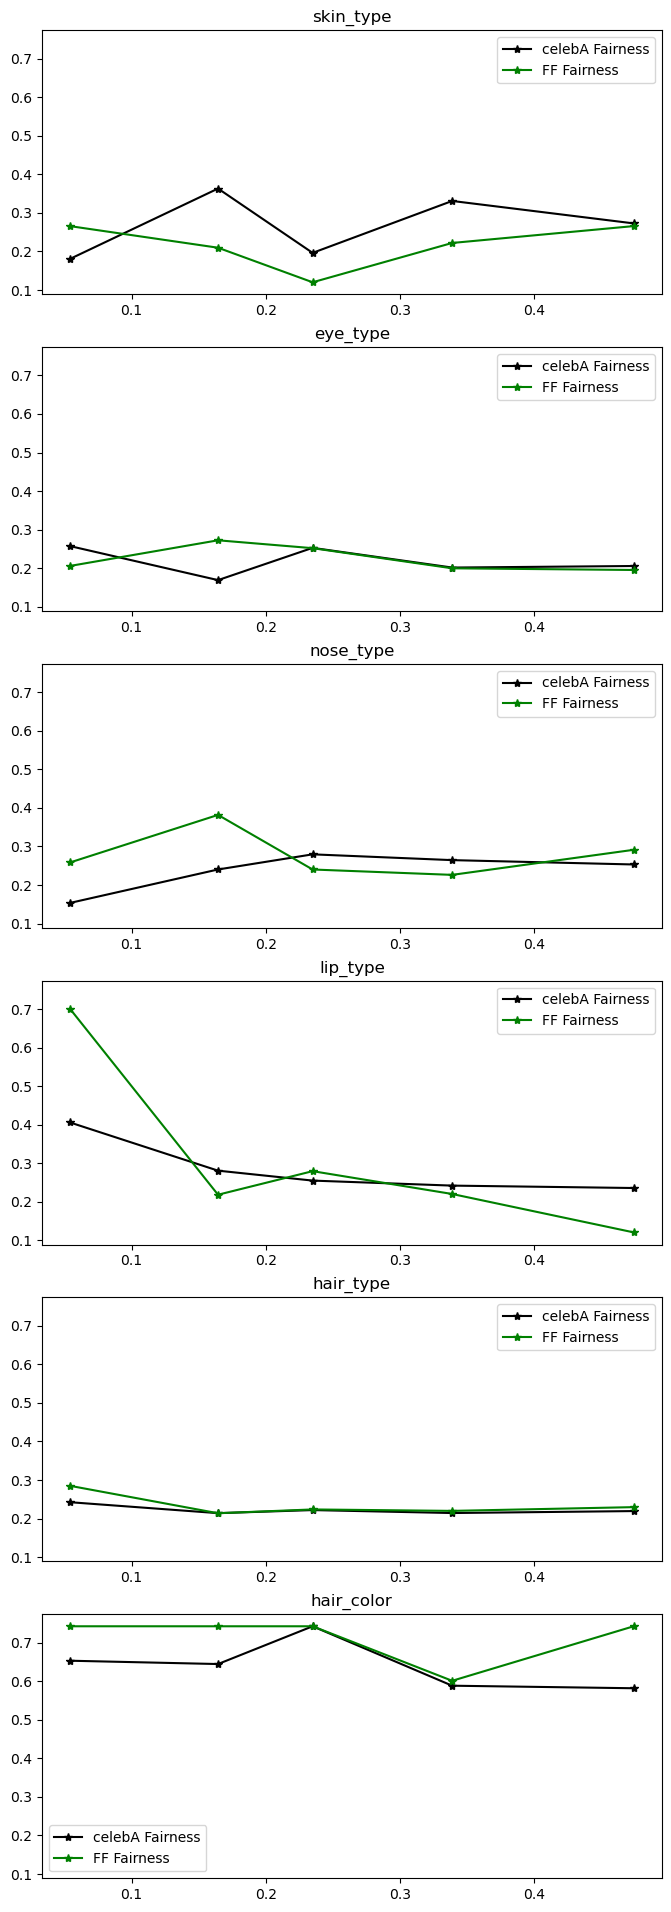

In [ ]:
plot_fairness_comparison(temp, ff_temp, rates)